# Challenge Chapter 2
Kelompok 6 Kelas DS-5 <br>
Nama Anggota:
1. An Naffila Putri Prasari
2. Rifqi Mufiddin

# Task Overview
1. **Reading Data:** Import and explore the dataset.
2. **Exploratory Data Analysis (EDA):** Analyze the distribution of variables, relationships, and visualize key insights.
3. **Data Preprocessing:** Handle missing values, data types, and encode categorical variables.
4. **Modeling:** Build and train a machine learning model for customer segmentation.
5. **Prediction:** Apply the model to predict the segments for new customers in the test dataset.

# Business Understanding

## Problem Statement
Perkembangan industri telekomunikasi telah memperketat persaingan antar provider. Di samping itu, pelanggan memiliki hak untuk memilih provider yang sesuai dengan kebutuhan mereka dan dapat beralih (churn) dari provider sebelumnya. Hal ini dapat menyebabkan berkurangnya pendapatan bagi perusahaan telekomunikasi sehingga penting untuk ditangani.

## Objective
Membangun model klasifikasi yang dapat mengenali pelanggan yang berpotensi beralih (churn) dari layanan telekomunikasi. Dengan demikian, perusahaan dapat mengambil tindakan untuk mempertahankan pelanggan.

# Import Library

In [ ]:
#!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
# import shap

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import plot_tree
import graphviz
from graphviz import Source
from IPython.display import SVG, display

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Test.csv to Data Test.csv
Saving Data Train.csv to Data Train.csv


# Reading Data

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Data Train.csv']))

In [ ]:
test_df = pd.read_csv(io.BytesIO(uploaded['Data Test.csv']))

In [ ]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
test_df

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


**Keterangan Variabel:**

* **id:** nomor id pelanggan
* **state:** kode negara
* **account_length:** masa aktif akun
* **area_code:** kode area
* **international_plan:** status berlangganan layanan internasional
* **voice_mail_plan:** status berlangganan layanan pesan suara
* **number_vmail_messages:** jumlah penggunaan layanan pesan suara
* **total_day_minutes:** jumlah menit yang dihabiskan pelanggan di pagi hari
* **total_day_calls:** total panggilan yang dilakukan di pagi hari
* **total_day_charge:** total charge di pagi hari
* **total_eve_minutes:** jumlah menit yang dihabiskan pelanggan di sore hari
* **total_eve_calls:** total panggilan yang dilakukan di sore hari
* **total_eve_charge:** total charge di sore hari
* **total_night_minutes:** jumlah menit yang dihabiskan pelanggan di malam hari
* **total_night_calls:** total panggilan yang dilakukan di malam hari
* **total_night_charge:** total charge di malam hari
* **total_intl_minutes:** jumlah menit yang dihabiskan pelanggan untuk layanan internasional
* **total_intl_calls:** total panggilan layanan internasional
* **total_intl_charge:** total charge untuk layanan internasional
* **number_customer_service_calls:** jumlah menghubungi CS
* **churn:** target (churn atau tidak)



In [ ]:
# Mengidentifikasi tipe data masing-masing variabel
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'number_customer_service_calls'], float64: ['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_charge', 'total_intl_minutes', 'total_intl_charge'], object: ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']}

In [ ]:
# Mengelompokkan variabel sebagai numerical dan categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include='object').columns

In [ ]:
# Melihat kolom yang bertipe numerikal
numerical_columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [ ]:
# Melihat kolom yang bertipe kategorikal
categorical_columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [ ]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Dari hasil di atas, terlihat bahwa **tidak ada missing value** dalam data yang kita miliki.


In [ ]:
# Cek duplikat data
df.duplicated().sum()

0

Dari hasil di atas, terlihat bahwa **tidak ada data duplikat** dalam data yang kita miliki.

In [ ]:
# Menampilkan kolom objek dengan lebih dari dua nilai unik
print("Fitur objek lebih dari dua nilai unik: ")
for column in df.select_dtypes(include='object').columns:
    if df[column].nunique() > 2:
        print(f"- {column}")

# Menampilkan kolom objek yang merupakan kategori biner
print("\nFitur objek dengan dua nilai unik - Kategori Biner:")
for column in df.select_dtypes(include='object').columns:
    if df[column].nunique() == 2:
        print(f"- {column}")

Fitur objek lebih dari dua nilai unik: 
- state
- area_code

Fitur objek dengan dua nilai unik - Kategori Biner:
- international_plan
- voice_mail_plan
- churn


## Descriptive Statistics

In [ ]:
# Melihat statistik deskriptif dari data
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


1. **account_length:**
   - **Rata-rata (mean):** 100.24
     Rata-rata panjang akun pelanggan adalah sekitar 100.24. Meskipun nilai ini memberikan gambaran umum, perlu diperhatikan bahwa terdapat variasi yang signifikan dalam panjang akun, dengan rentang dari 1 hingga 243.

   - **Standar Deviasi (std):** 39.70
     Standar deviasi yang tinggi (39.70) menunjukkan adanya variasi yang besar di antara nilai-nilai panjang akun. Ini mengindikasikan sejauh mana nilai-nilai individu tersebar dari rata-rata.

   - **Rentang (min - max):** 1 - 243
     Rentang panjang akun mencakup nilai minimum 1 hingga nilai maksimum 243, menunjukkan keragaman besar dalam data.

2. **number_vmail_messages:**
   - **Rata-rata (mean):** 7.63
     Rata-rata jumlah pesan suara voicemail per pelanggan adalah sekitar 7.63. Terdapat variasi yang signifikan dalam jumlah pesan, yang dapat mencerminkan kebiasaan penggunaan voicemail yang berbeda-beda.

   - **Standar Deviasi (std):** 13.44
     Standar deviasi yang tinggi (13.44) menunjukkan variasi yang besar dalam jumlah pesan voicemail di antara pelanggan. Ini dapat mengindikasikan bahwa beberapa pelanggan menggunakan voicemail secara lebih aktif daripada yang lain.

   - **Rentang (min - max):** 0 - 52
     Rentang jumlah pesan voicemail mencakup nilai minimum 0 hingga nilai maksimum 52, menunjukkan keragaman besar dalam frekuensi penggunaan voicemail.

3. **number_customer_service_calls:**
   - **Rata-rata (mean):** 1.56
     Rata-rata panggilan ke layanan pelanggan per pelanggan adalah sekitar 1.56. Hal ini menunjukkan bahwa secara umum, pelanggan tidak sering melakukan panggilan ke layanan pelanggan.

   - **Standar Deviasi (std):** 1.31
     Standar deviasi yang relatif rendah (1.31) menunjukkan bahwa variasi dalam jumlah panggilan ke layanan pelanggan cukup kecil.

   - **Rentang (min - max):** 0 - 9
     Rentang jumlah panggilan ke layanan pelanggan mencakup nilai minimum 0 hingga nilai maksimum 9, menunjukkan variasi yang terbatas.

4. **total_day_minutes:**
   - **Rata-rata (mean):** 180.26
     Rata-rata total menit berbicara selama siang hari per pelanggan adalah sekitar 180.26 menit. Standar deviasi yang tinggi (54.01) menunjukkan variasi yang cukup besar dalam penggunaan layanan ini.

   - **Standar Deviasi (std):** 54.01
     Standar deviasi yang tinggi (54.01) menunjukkan variasi yang cukup besar dalam penggunaan layanan ini.

   - **Rentang (min - max):** 0 - 351.5
     Rentang total menit berbicara selama siang hari mencakup nilai minimum 0 hingga nilai maksimum 351.5, menunjukkan keragaman besar dalam penggunaan layanan ini.

5. **total_intl_minutes:**
   - **Rata-rata (mean):** 10.26
     Rata-rata total menit panggilan internasional per pelanggan adalah sekitar 10.26 menit. Standar deviasi yang relatif rendah (2.76) menunjukkan variasi yang stabil dalam penggunaan layanan panggilan internasional.

   - **Standar Deviasi (std):** 2.76
     Standar deviasi yang rendah (2.76) menunjukkan variasi yang stabil dalam penggunaan layanan ini.

   - **Rentang (min - max):** 0 - 20
     Rentang total menit panggilan internasional mencakup nilai minimum 0 hingga nilai maksimum 20, menunjukkan variasi yang terbatas dalam penggunaan layanan ini.


## Unique & Frequency

In [ ]:
# Periksa nilai unik dan frekuensinya
numeric_unique_values = {column: df[column].unique() for column in df.select_dtypes(include=['int64', 'float64']).columns}
numeric_value_frequencies = {column: df[column].value_counts() for column in df.select_dtypes(include=['int64', 'float64']).columns}

categorical_unique_values = {column: df[column].unique() for column in df.select_dtypes(include='object').columns}
categorical_value_frequencies = {column: df[column].value_counts() for column in df.select_dtypes(include='object').columns}

### Variabel Numerik

In [ ]:
print("Nilai Unik Numerik:")
for column, values in numeric_unique_values.items():
    print(f"{column}: {values}")
    print()

Nilai Unik Numerik:
account_length: [107 137  84  75 121 147 117 141  65  74 168  95 161  85  76  73  77 130
 111 132  57  54  20  49  12  36  78 136  98 135  34 160  64  59 142  97
  52  60  10  96  81 125 174 116 149  38  40  43 113 126 150 138 162  90
  50  82 144  46  70 128  94 155  80  99 120 108 122  93 157  63  41 193
  61  92 163  91 127 110 103 145  56 151  83 139   6 115  62 185 148  32
  68  25 179  67  19 170 106  51 118 208 131  53 105  66  35  88 123  45
 100 215  22  33  86 114  24 119 101 146 143  48 167  89 199 166 158 196
 112 209  16  39 104 129  55  44  79 159 194  87  21 133 224 140  58 109
  71  72 124 102 165  18  30 190  47 152  26  69  31 186 171  28 153 172
 169  13 189 176 156  37  27 134 243  42  23   1 200   5 178 181 182 217
 164 177  11   9 173 154  29 180   3   2   7 232 192 195 197 225 191 201
  15  17 183 212 210 175   4 184 188 204 221 187  14 216 222   8 202]

number_vmail_messages: [26  0 24 37 27 33 39 25 30 41 28 34 46 29 35 21 42 22 36 23 43 31 

In [ ]:
print("Frekuensi Nilai Numerik:")
for column, frequencies in numeric_value_frequencies.items():
    print(f"{column}:\n{frequencies}")
    print()

Frekuensi Nilai Numerik:
account_length:
90     53
87     51
93     50
105    48
100    48
       ..
191     1
243     1
199     1
215     1
202     1
Name: account_length, Length: 215, dtype: int64

number_vmail_messages:
0     3139
31      69
28      58
24      57
29      57
33      55
27      54
26      53
30      47
32      47
25      46
23      40
22      38
34      36
38      35
39      35
21      35
35      34
37      32
36      31
20      29
19      25
40      22
41      18
42      17
18      16
17      16
16      15
43      13
15      12
45      10
12      10
46       7
14       7
44       7
48       4
47       4
10       4
13       3
49       3
6        2
50       2
11       2
8        2
4        1
52       1
Name: number_vmail_messages, dtype: int64

total_day_minutes:
189.3    10
180.0     9
154.0     8
177.1     8
184.5     8
         ..
289.8     1
268.8     1
27.0      1
213.1     1
170.0     1
Name: total_day_minutes, Length: 1843, dtype: int64

total_day_calls:
105    

### Variabel Kategorikal

In [ ]:
print("Nilai Unik Kategorikal:")
for column, values in categorical_unique_values.items():
    print(f"{column}: {values}")
    print()

Nilai Unik Kategorikal:
state: ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']

area_code: ['area_code_415' 'area_code_408' 'area_code_510']

international_plan: ['no' 'yes']

voice_mail_plan: ['yes' 'no']

churn: ['no' 'yes']



In [ ]:
print("Frekuensi Nilai Kategorikal:")
for column, frequencies in categorical_value_frequencies.items():
    print(f"{column}:\n{frequencies}")
    print()

Frekuensi Nilai Kategorikal:
state:
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

area_code:
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

international_plan:
no     3854
yes     396
Name: international_plan, dtype: int64

voice_mail_plan:
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

churn:
no     3652
yes     598
Name: churn, dtype: int64



## Cek Variabel Target

In [ ]:
df['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

Dari hasil di atas, dapat diketahui bahwa **data imbalance**.

## Korelasi

In [ ]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893


# Exploratory Data Analysis

## 1. Berapa persentase pelanggan yang churn?

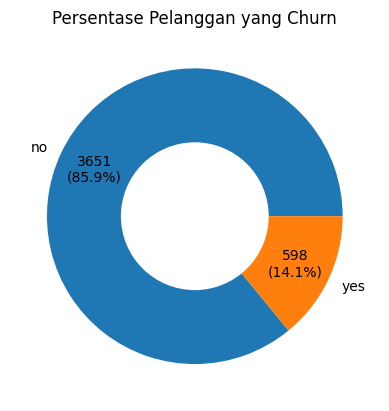

In [ ]:
# Membuat pie chart
churn_df = df['churn'].value_counts()
plt.pie(churn_df, labels = churn_df.index, autopct=lambda p: f'{int(p * sum(churn_df) / 100)}\n({p:.1f}%)', pctdistance=0.75)
plt.title("Persentase Pelanggan yang Churn")

# Menambahkan lingkaran di pie chart (donut chart)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Menampilkan chart
plt.show()

Dari donut chart di atas, dapat diketahui bahwa 14.1% pelanggan melakukan churn.

## 2. Negara bagian mana yang memiliki pelanggan paling banyak?

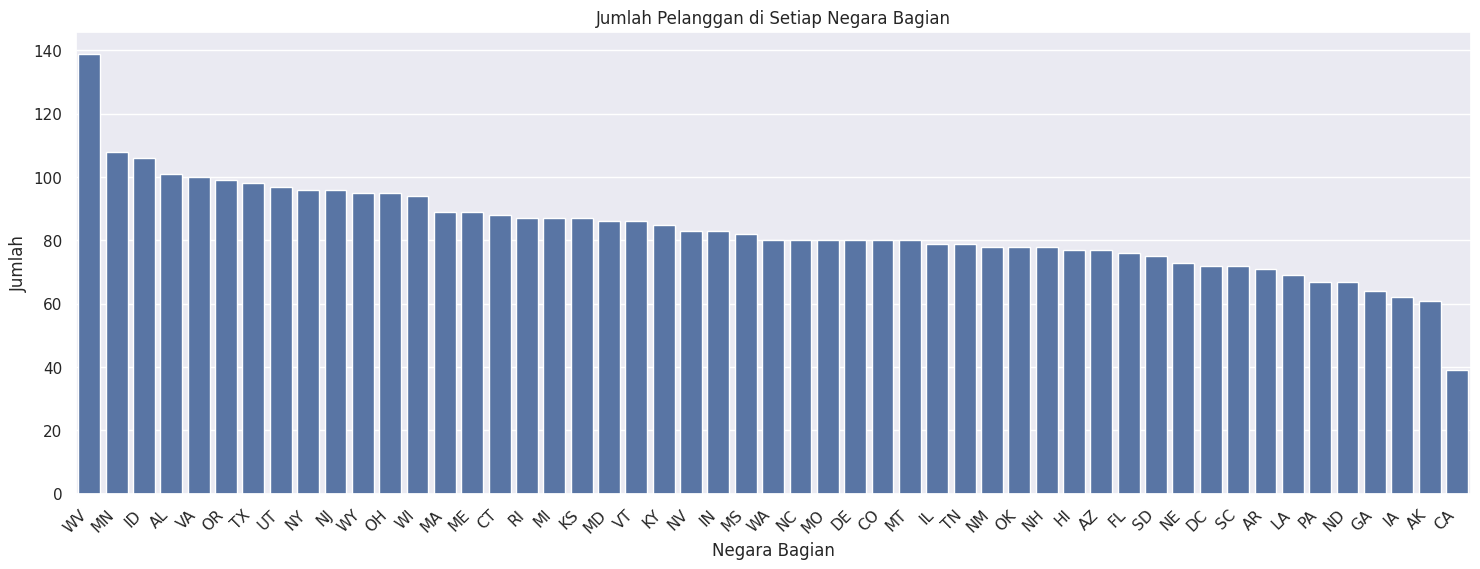

In [ ]:
# Setel tema seaborn untuk tampilan yang lebih baik
sns.set_theme()

# Membuat bar chart untuk variabel "state"
plt.figure(figsize=(18, 6))
sns.countplot(x='state', data=df, order=df['state'].value_counts().index)
plt.title('Jumlah Pelanggan di Setiap Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

Dari visualisasi di atas, dapat diketahui bahwa lima negera bagian teratas dengan jumlah pelanggan paling banyak yaitu:
1. West Virginia (WV)
2. Minnesota (MN)
3. Idaho (ID)
4. Alabama (AL)
5. Virginia (VA)

## 3. Bagaimana distribusi masa aktif akun pelanggan?

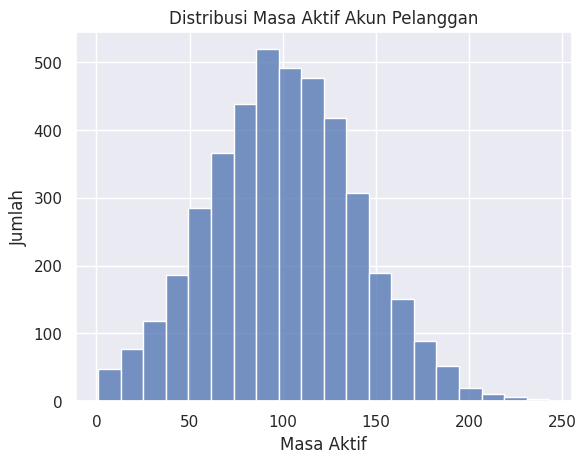

In [ ]:
# Membuat histogram untuk melihat distribusi masa aktif akun pelanggan
sns.histplot(df['account_length'], bins=20)
plt.title("Distribusi Masa Aktif Akun Pelanggan")
plt.xlabel('Masa Aktif')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan histogram di atas, kita dapat mengetahui sebaran datanya cenderung simetris. Hal ini menandakan bahwa rataan, median dan modusnya bernilai sama. Kita juga mendapatkan informasi bahwa masa aktif akun pelanggan terbanyak berada pada selang 87-100 hari dengan jumlah mencapai lebih dari 500 pelanggan.

## 4. Berapa jumlah pengguna yang berlangganan layanan internasional dan pesan suara?

In [ ]:
# Fungsi untuk menghitung persentase
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True))
    tab['Churn Percentage'] = (tab['yes'] / tab['All'] * 100).round(2)
    tab.reset_index(inplace=True)
    tab.columns = [var, 'Churn_NO', 'Churn_YES', 'Total', 'Churn Rate']
    return tab

  international_plan  Churn_NO  Churn_YES  Total  Churn Rate
0                 no      3423        431   3854       11.18
1                yes       229        167    396       42.17
2                All      3652        598   4250       14.07


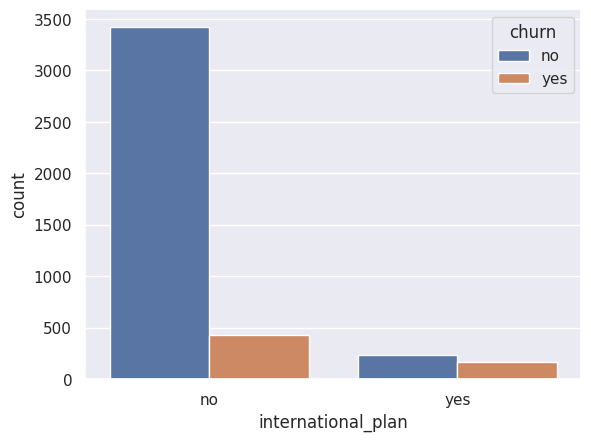

In [ ]:
# Menampilkan countplot
sns.countplot(data=df, x='international_plan', hue='churn')

# Menampilkan crosstab dengan persentase churn
print(crosstab_function(df, 'international_plan'))

Dari tabel di atas, dapat diketahui bahwa pelanggan yang **berlangganan Layanan Internasional** lebih mungkin untuk melakukan **churn** (42.17%).

  voice_mail_plan  Churn_NO  Churn_YES  Total  Churn Rate
0              no      2622        516   3138       16.44
1             yes      1030         82   1112        7.37
2             All      3652        598   4250       14.07


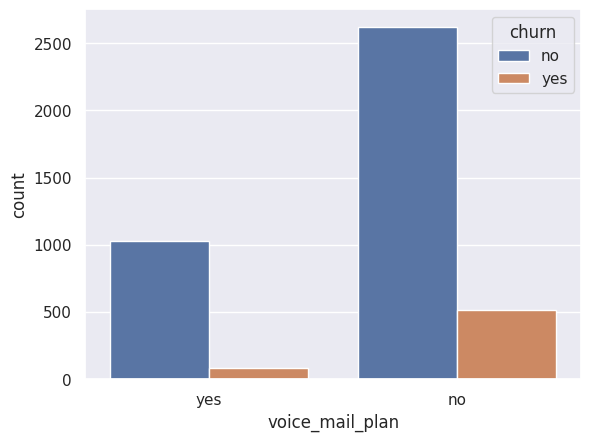

In [ ]:
# Menampilkan countplot
sns.countplot(data=df, x='voice_mail_plan', hue='churn')

# Menampilkan crosstab dengan persentase churn
print(crosstab_function(df, 'voice_mail_plan'))

Dari tabel di atas, dapat diketahui bahwa pelanggan yang **berlangganan Voice Mail** lebih cenderung untuk **tidak churn** (7.37%)

## 5. Apakah jumlah panggilan ke Customer Service berpengaruh pada keputusan churn?

,number_customer_service_calls,Churn_NO,Churn_YES,Total,Churn Rate
0,0,789,97,886,10.95
1,1,1358,166,1524,10.89
2,2,845,102,947,10.77
3,3,495,63,558,11.29
4,4,117,92,209,44.02
5,5,32,49,81,60.49
6,6,9,19,28,67.86
7,7,6,7,13,53.85
8,8,1,1,2,50.00
9,9,0,2,2,100.00


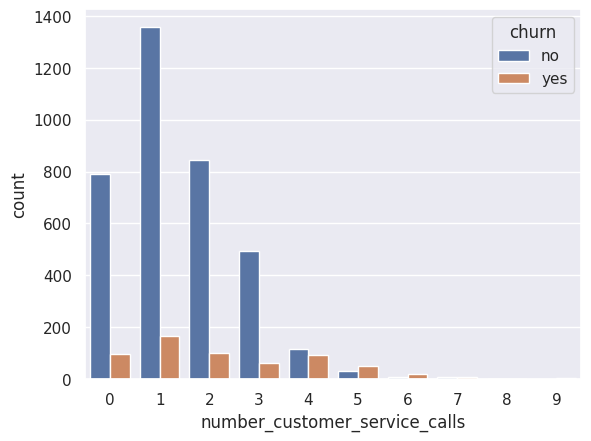

In [ ]:
sns.countplot(data=df, x=df['number_customer_service_calls'], hue=df['churn']);

crosstab_function(df,'number_customer_service_calls')

Dari tabel di atas, dapat dilihat bahwa **tingkat churn meningkat** ketika jumlah panggilan ke Customer Service terjadi **lebih dari 3 kali**.

## Variabel Numerik

### Histogram
Memvisualisasikan distribusi variabel numerik

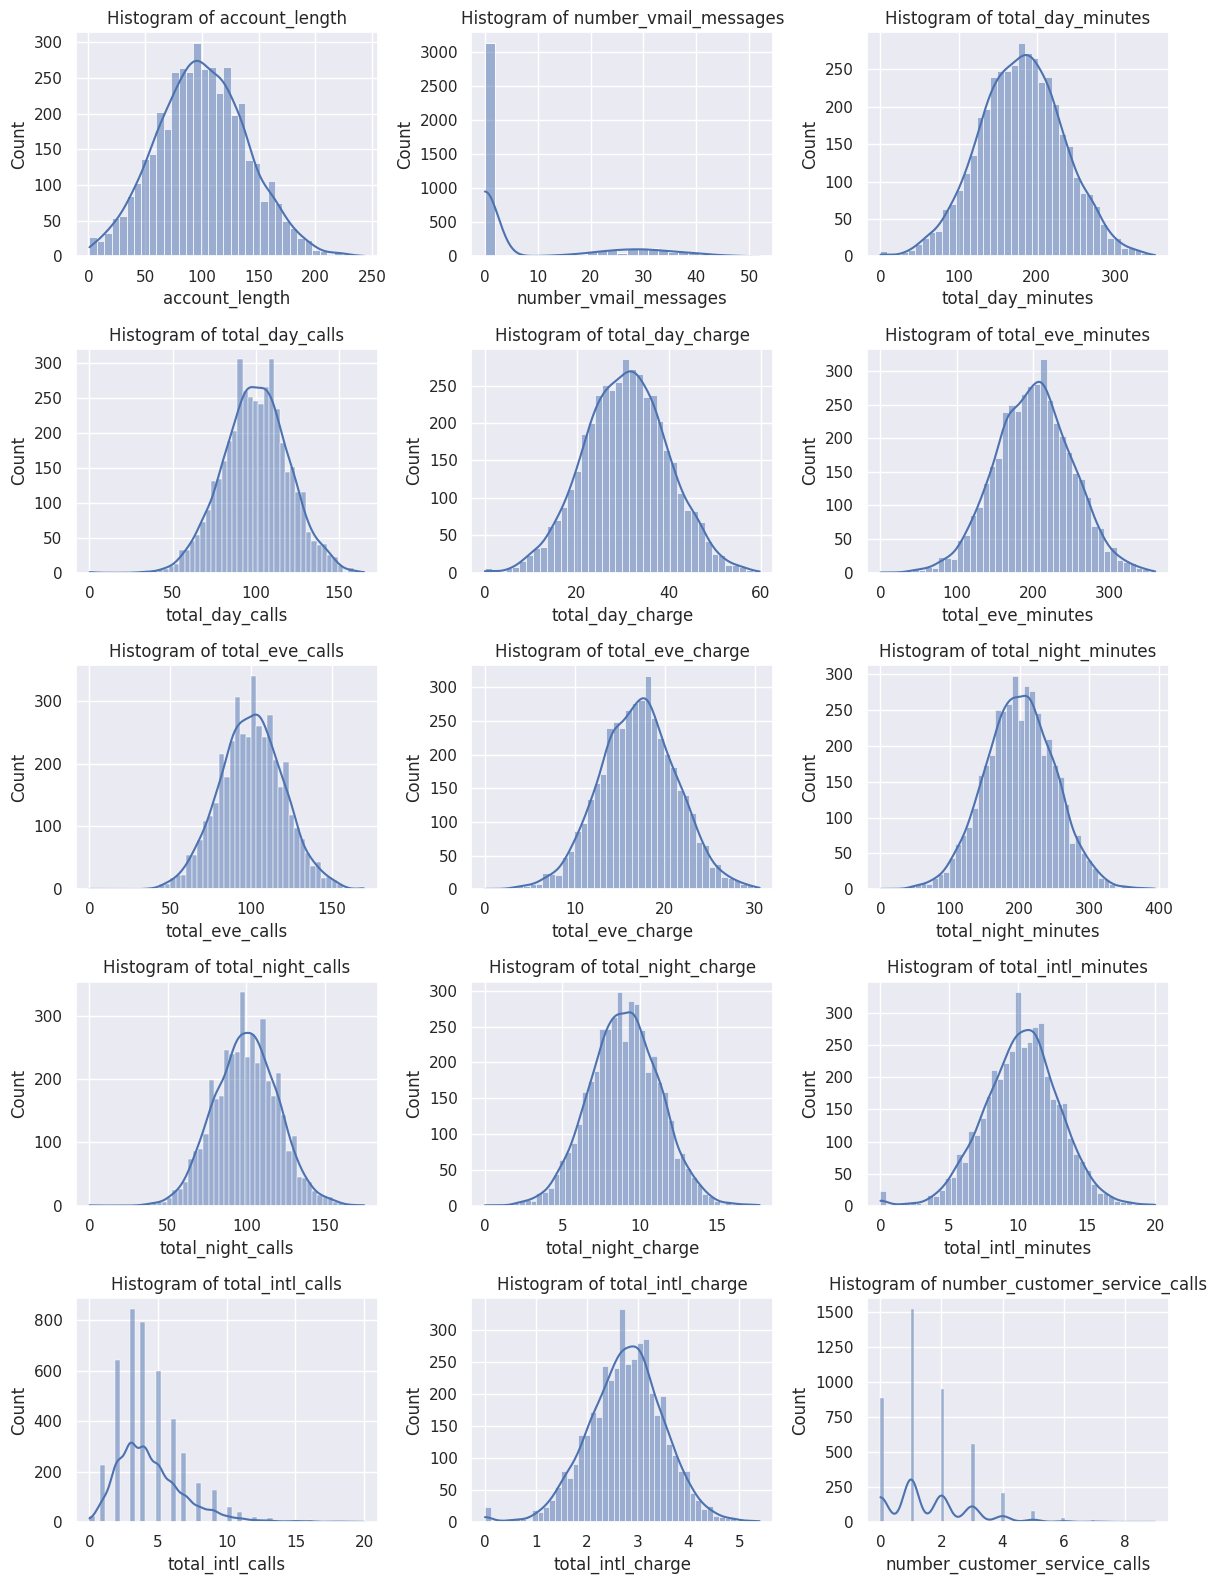

In [ ]:
plt.figure(figsize=(12, 16))
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_numerical_columns = len(numerical_columns)

# Tentukan jumlah baris dan kolom untuk subplot
num_rows = (num_numerical_columns // 3) + min(num_numerical_columns % 3, 1)
num_cols = min(num_numerical_columns, 3)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


### Box Plot
Menunjukkan sebaran, kuartil, dan deteksi outlier.

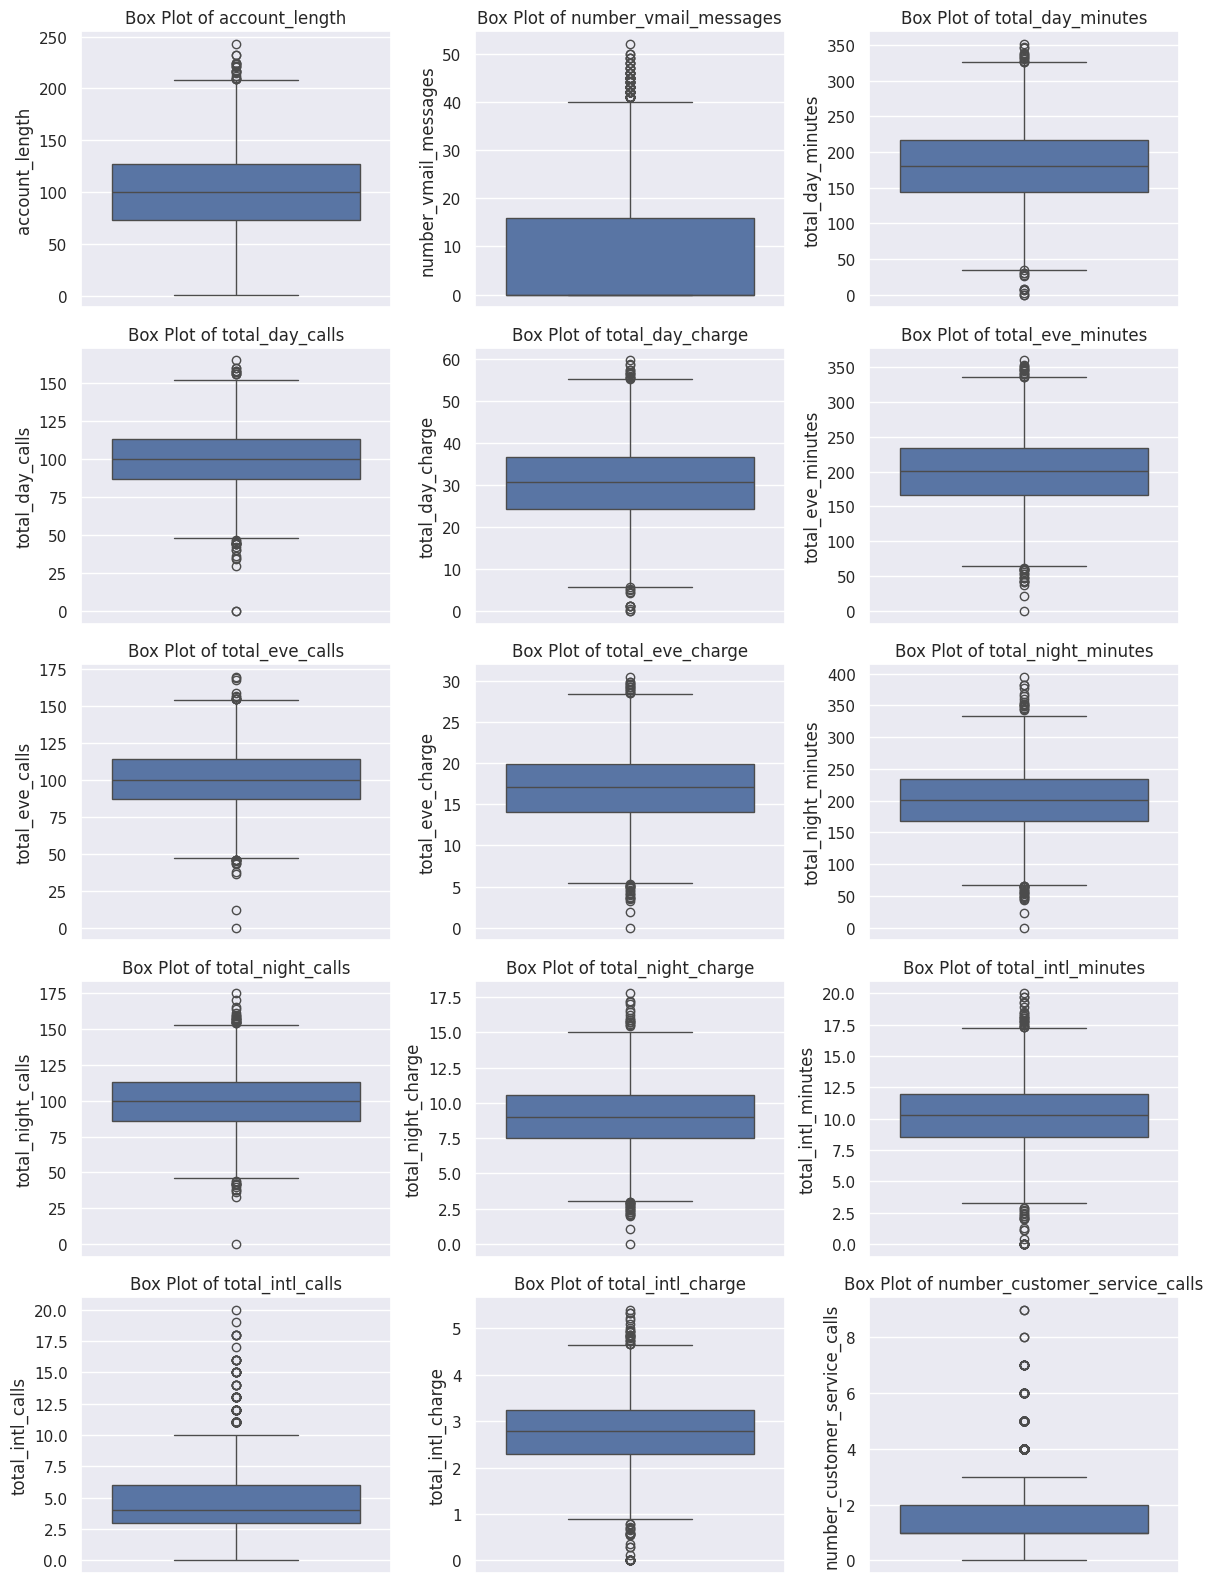

In [ ]:
plt.figure(figsize=(12, 16))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

### Heatmap Korelasi
Menunjukkan korelasi antara variabel numerik

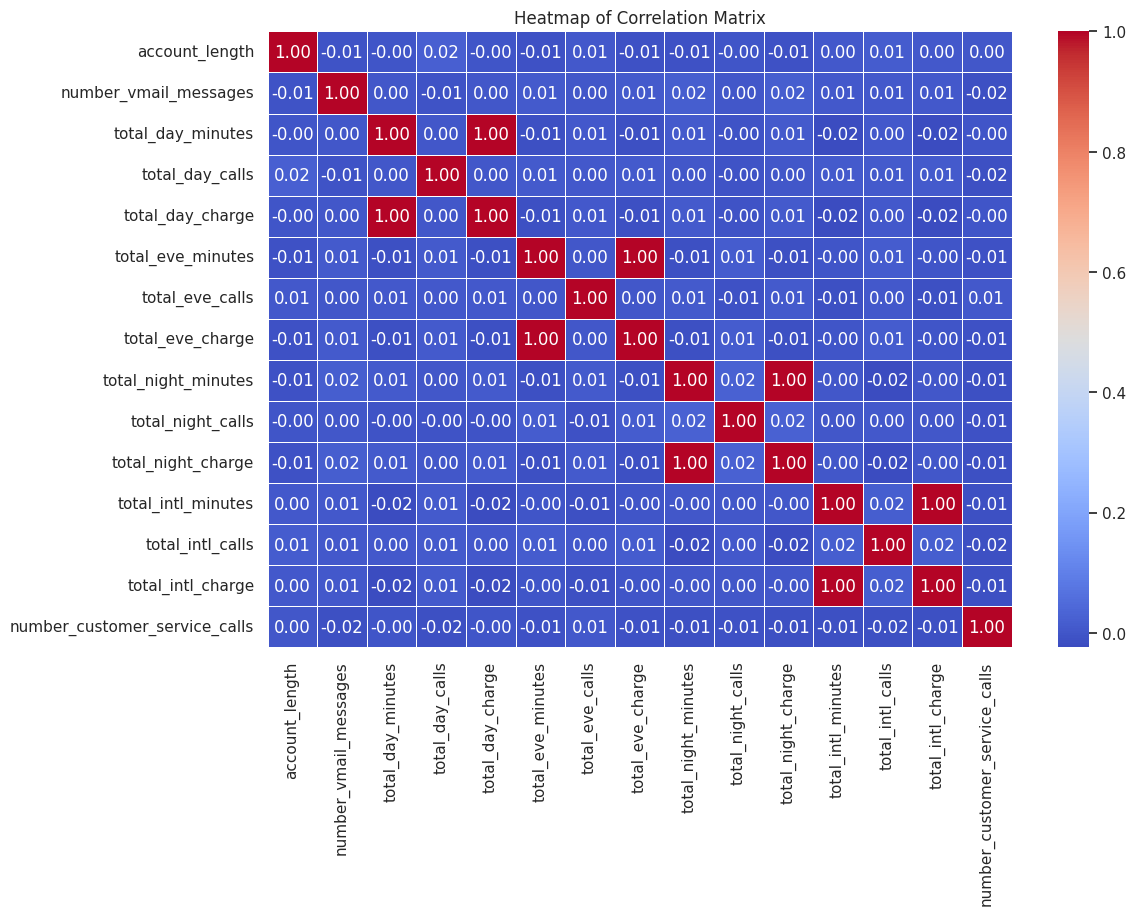

In [ ]:
# Hitung matriks korelasi
correlation_matrix = df[numerical_columns].corr()

# Buat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Variabel Kategorikal

### Pie Chart

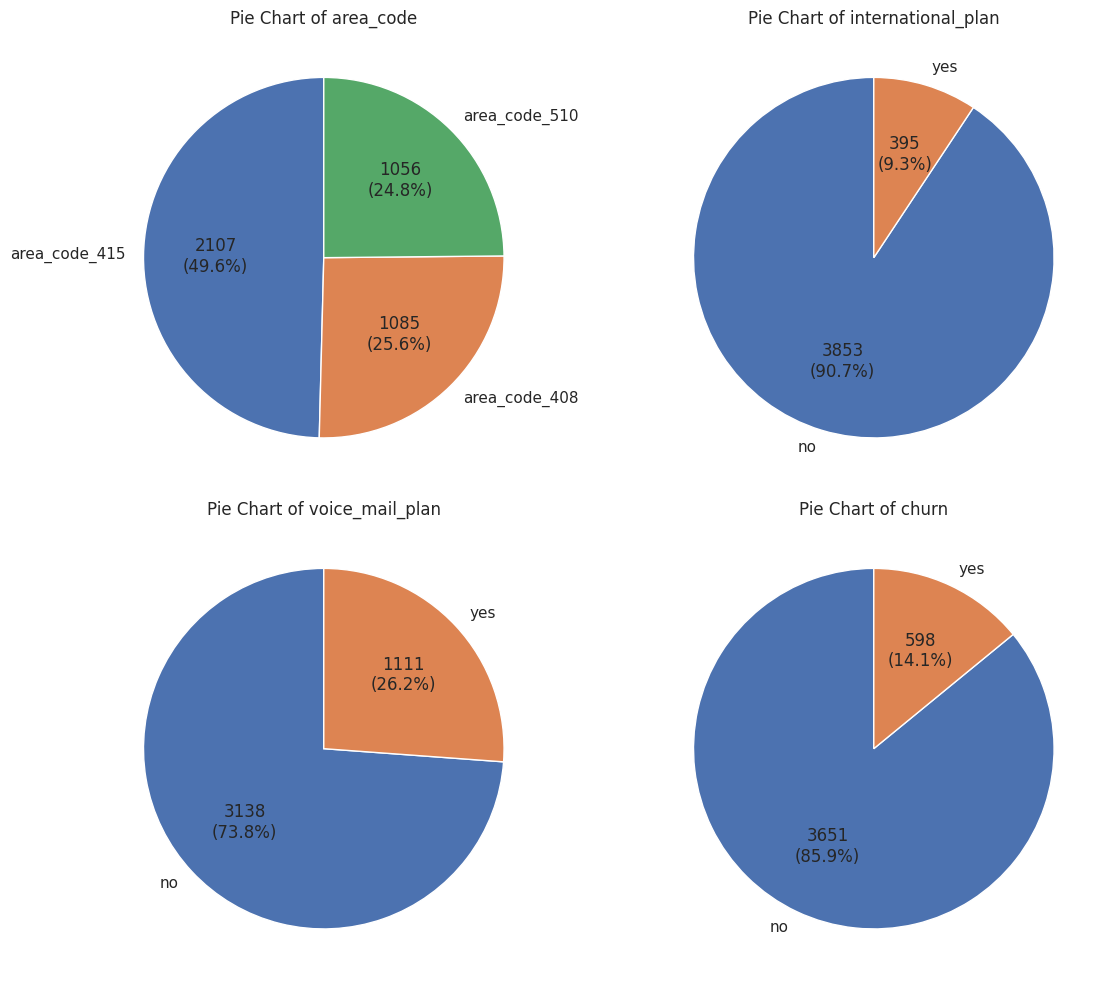

In [ ]:
# Setel tema seaborn untuk tampilan yang lebih baik
sns.set_theme()

# Daftar variabel kategorikal untuk membuat pie chart
categorical_pie_columns = ['area_code', 'international_plan', 'voice_mail_plan', 'churn']

# Tentukan jumlah baris dan kolom untuk subplot
num_rows = (len(categorical_pie_columns) // 2) + min(len(categorical_pie_columns) % 2, 1)
num_cols = min(len(categorical_pie_columns), 2)

# Buat subplot untuk pie chart
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Loop melalui setiap variabel kategorikal dan buat pie chart di setiap subplot
for i, column in enumerate(categorical_pie_columns):
    row = i // num_cols
    col = i % num_cols
    counts = df[column].value_counts()
    axes[row, col].pie(counts, labels=counts.index, autopct=lambda p: f'{int(p * sum(counts) / 100)}\n({p:.1f}%)', startangle=90)
    axes[row, col].set_title(f'Pie Chart of {column}')

# Atur layout untuk penataan subplot yang lebih baik
plt.tight_layout()
plt.show()

### Cross Tabulation

In [ ]:
for column in categorical_columns:
    cross_tab = pd.crosstab(index=df[column], columns=df['churn'])
    print(f"\nCross-tabulation for {column} and churn:")
    print(cross_tab)


Cross-tabulation for state and churn:
churn   no  yes
state          
AK      57    4
AL      88   13
AR      60   11
AZ      70    7
CA      29   10
CO      71    9
CT      73   15
DC      64    8
DE      67   13
FL      67    9
GA      57    7
HI      73    4
IA      55    7
ID      94   12
IL      73    6
IN      70   13
KS      72   15
KY      73   12
LA      62    7
MA      75   14
MD      67   19
ME      73   16
MI      72   15
MN      89   19
MO      70   10
MS      67   15
MT      63   17
NC      73    7
ND      61    6
NE      68    5
NH      68   10
NJ      70   26
NM      68   10
NV      66   17
NY      80   16
OH      83   12
OK      62   16
OR      84   15
PA      59    8
RI      81    6
SC      58   14
SD      64   11
TN      67   12
TX      79   19
UT      85   12
VA      95    5
VT      76   10
WA      62   18
WI      87    7
WV     120   19
WY      85   10

Cross-tabulation for area_code and churn:
churn            no  yes
area_code               
area_code_408   934 

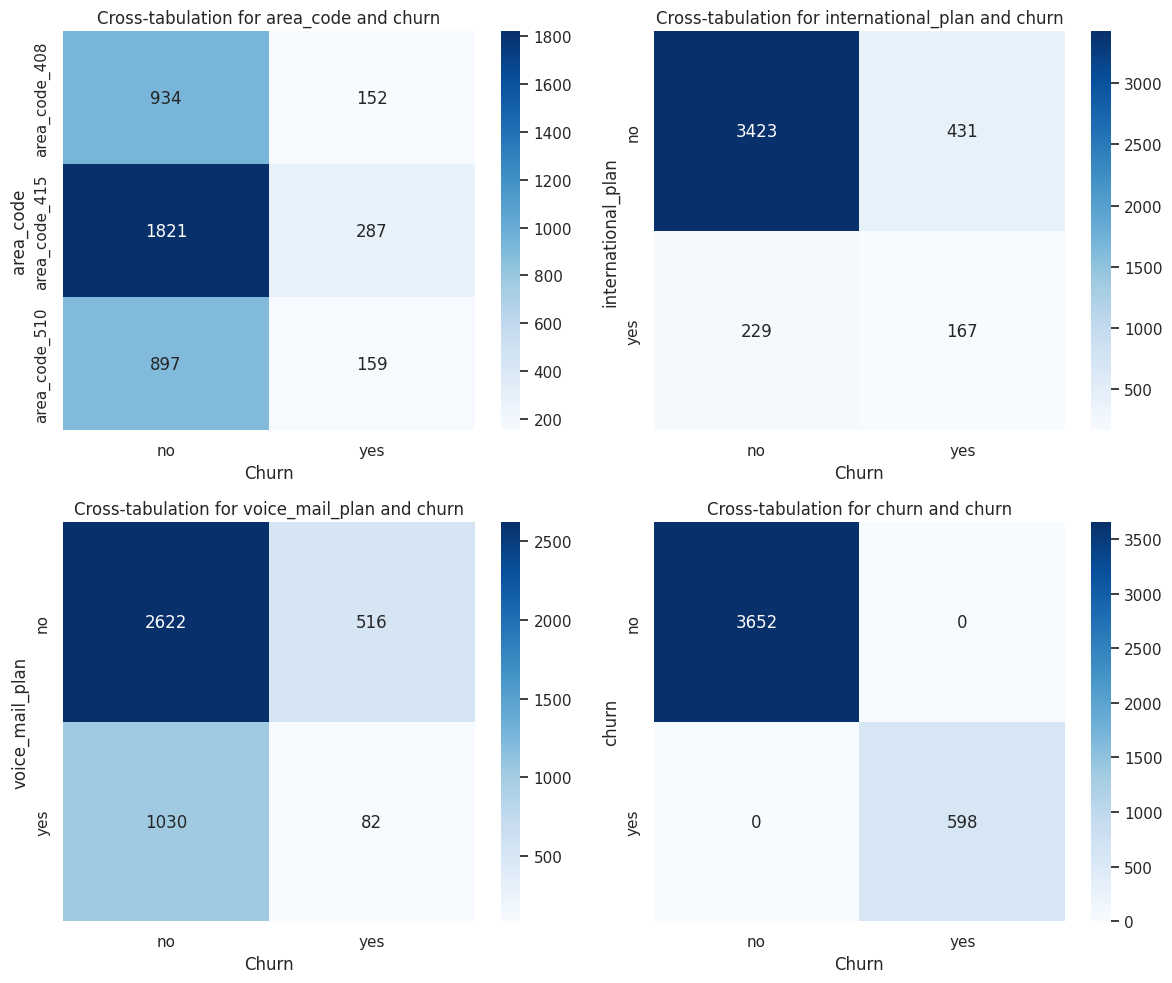

In [ ]:
# Hapus kolom 'state' dari categorical_columns
categorical_columns_without_state = [col for col in categorical_columns if col != 'state']

# Tentukan jumlah baris dan kolom untuk subplot
num_rows = (len(categorical_columns_without_state) // 2) + min(len(categorical_columns_without_state) % 2, 1)
num_cols = min(len(categorical_columns_without_state), 2)

# Tentukan ukuran gambar subplot secara keseluruhan
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Loop untuk membuat visualisasi cross-tabulation
for i, column in enumerate(categorical_columns_without_state, 1):
    cross_tab = pd.crosstab(index=df[column], columns=df['churn'])
    plt.subplot(num_rows, num_cols, i)
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Cross-tabulation for {column} and churn')
    plt.xlabel('Churn')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


### Analisis Bivariate untuk Fitur Kategorikal

<ipython-input-37-fcb7a18c62ed>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-37-fcb7a18c62ed>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-37-fcb7a18c62ed>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-37-fcb7a18c62ed>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-37-fcb7a18c62ed>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


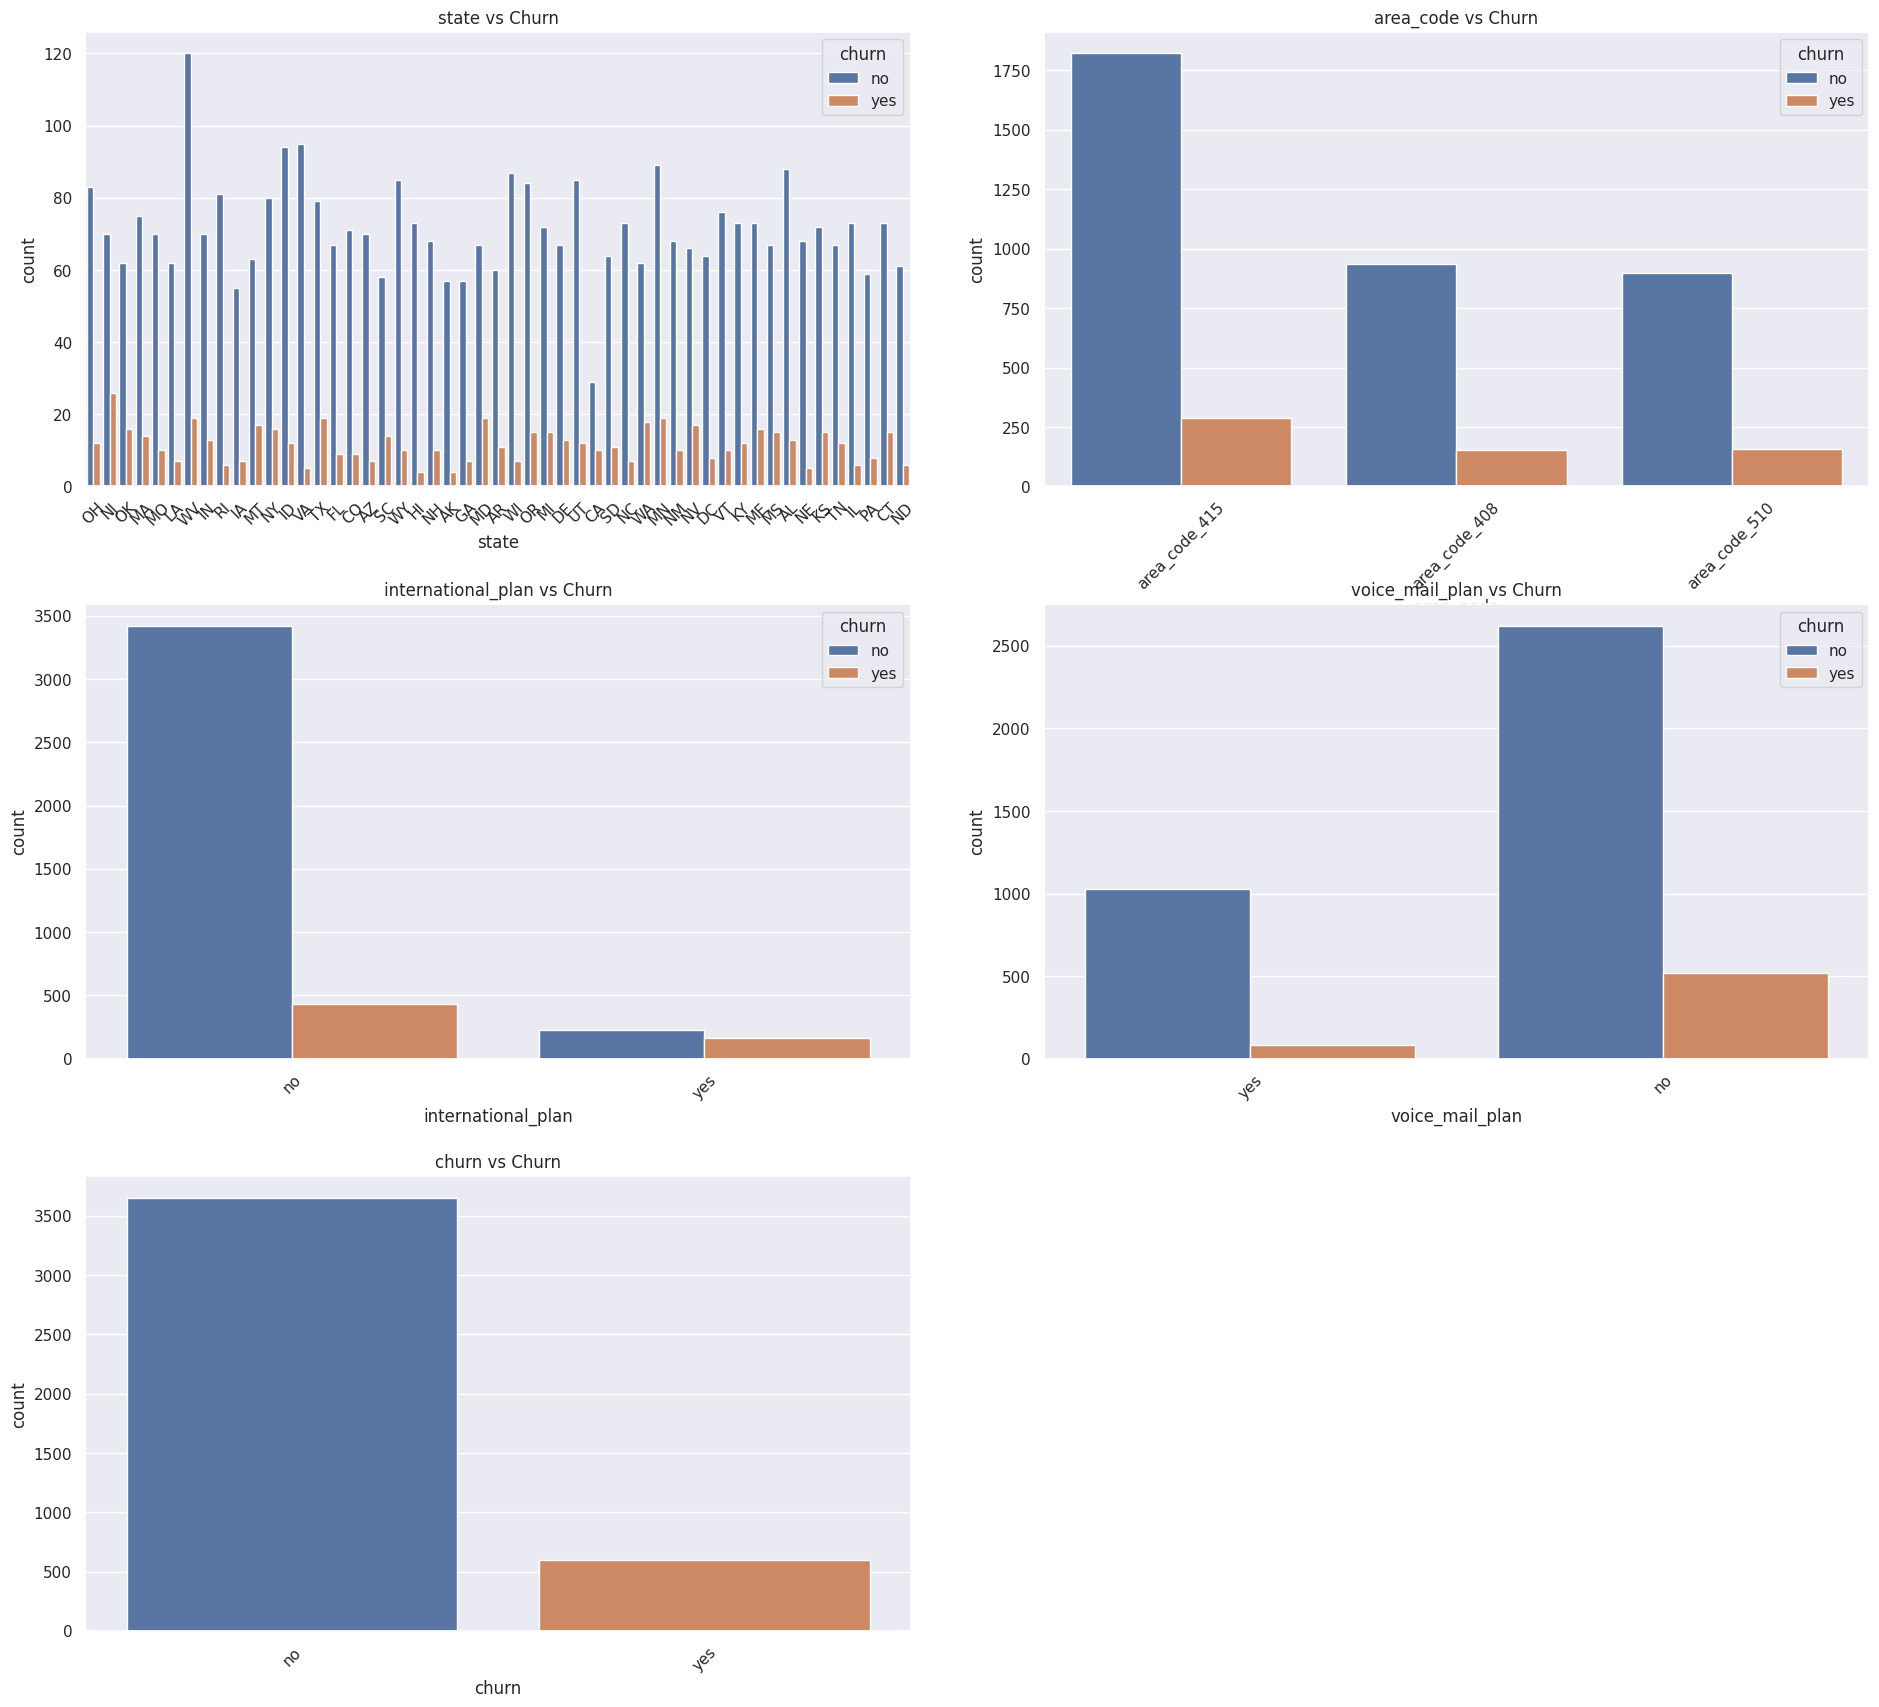

In [ ]:
# Menggunakan visualisasi untuk membandingkan fitur kategorikal dengan target 'churn'
# Hitung jumlah baris yang dibutuhkan untuk subplot, asumsikan kita ingin 2 kolom per baris
n_cols = 2
n_rows = int(np.ceil(len(categorical_columns) / n_cols))

# Buat figure dan axes untuk subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
fig.tight_layout(pad=5.0)

# Iterasi melalui fitur kategorikal dan buat plot
for i, column in enumerate(categorical_columns):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.countplot(x=column, hue='churn', data=df, ax=ax)
    ax.set_title(f'{column} vs Churn')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Sembunyikan axes kosong jika ada
for j in range(i + 1, n_rows * n_cols):
    axes.flat[j].set_visible(False)

plt.show()

## Analisis hubungan antara kolom dengan target menggunakan t-test dan chi-square

In [ ]:
# Analisis variabel numerik terhadap churn tanpa menambahkan kolom churn_numeric
ttest_results = {}

for column in numerical_columns:
    group1 = df[df['churn'] == 'yes'][column]
    group2 = df[df['churn'] == 'no'][column]
    t_stat, p_val = ttest_ind(group1, group2)
    ttest_results[column] = p_val

ttest_results

{'account_length': 0.20656404062197833,
 'number_vmail_messages': 5.511380934340949e-11,
 'total_day_minutes': 9.613748127736892e-46,
 'total_day_calls': 0.4480528815925684,
 'total_day_charge': 9.691717969092075e-46,
 'total_eve_minutes': 2.643535285080068e-07,
 'total_eve_calls': 0.6568492896605,
 'total_eve_charge': 2.6468612771912965e-07,
 'total_night_minutes': 0.002351794219207612,
 'total_night_calls': 0.40785916127423794,
 'total_night_charge': 0.0023549642264044796,
 'total_intl_minutes': 0.00031900405625173657,
 'total_intl_calls': 0.025200582343272954,
 'total_intl_charge': 0.0003197400009862881,
 'number_customer_service_calls': 2.858849472646715e-48}

**Variabel Numerik:**

* Variabel seperti **number_vmail_messages**, **total_day_minutes**, **total_day_charge**, **total_eve_minutes**, **total_eve_charge**, **total_night_minutes**, **total_night_charge**, **total_intl_minutes**, **total_intl_calls**, **total_intl_charge**, dan **number_customer_service_calls** memiliki p-value < 0.05, menunjukkan perbedaan yang signifikan secara statistik terhadap churn. Ini berarti variabel-variabel ini memiliki hubungan yang signifikan dengan kemungkinan churn pelanggan.

* Variabel lain seperti **account_length**, **total_day_calls**, **total_eve_calls**, dan **total_night_calls** memiliki p-value > 0.05, menunjukkan tidak adanya bukti yang cukup untuk menyatakan bahwa terdapat perbedaan signifikan yang berhubungan dengan churn.

In [ ]:
# Analisis variabel kategorikal terhadap churn
categorical_columns = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
chi2_results = {}

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[column] = p

chi2_results

{'state': 0.0011690284839826976,
 'area_code': 0.5442605842955197,
 'international_plan': 1.9831895448817517e-63,
 'voice_mail_plan': 1.139803854851859e-13}

**Variabel Kategorikal:**

* Variabel **state** dan **international_plan**, serta **voice_mail_plan** memiliki p-value < 0.05, menunjukkan adanya hubungan yang signifikan dengan churn. Ini menunjukkan bahwa lokasi (**state**), memiliki **international_plan**, dan **voice_mail_plan** berpengaruh terhadap kemungkinan churn pelanggan.

* **area_code** memiliki p-value > 0.05, menunjukkan tidak adanya hubungan yang signifikan dengan churn.

# Data Preprocessing

## Data Cleaning

In [ ]:
# Cek missing value
print(df.isnull().sum())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


Dari hasil di atas, terlihat bahwa **tidak ada missing value** dalam data yang kita miliki.

In [ ]:
# Cek duplikat data
df.duplicated().sum()

0

Dari hasil di atas, terlihat bahwa **tidak ada data duplikat** dalam data yang kita miliki.

## Detect Outliers

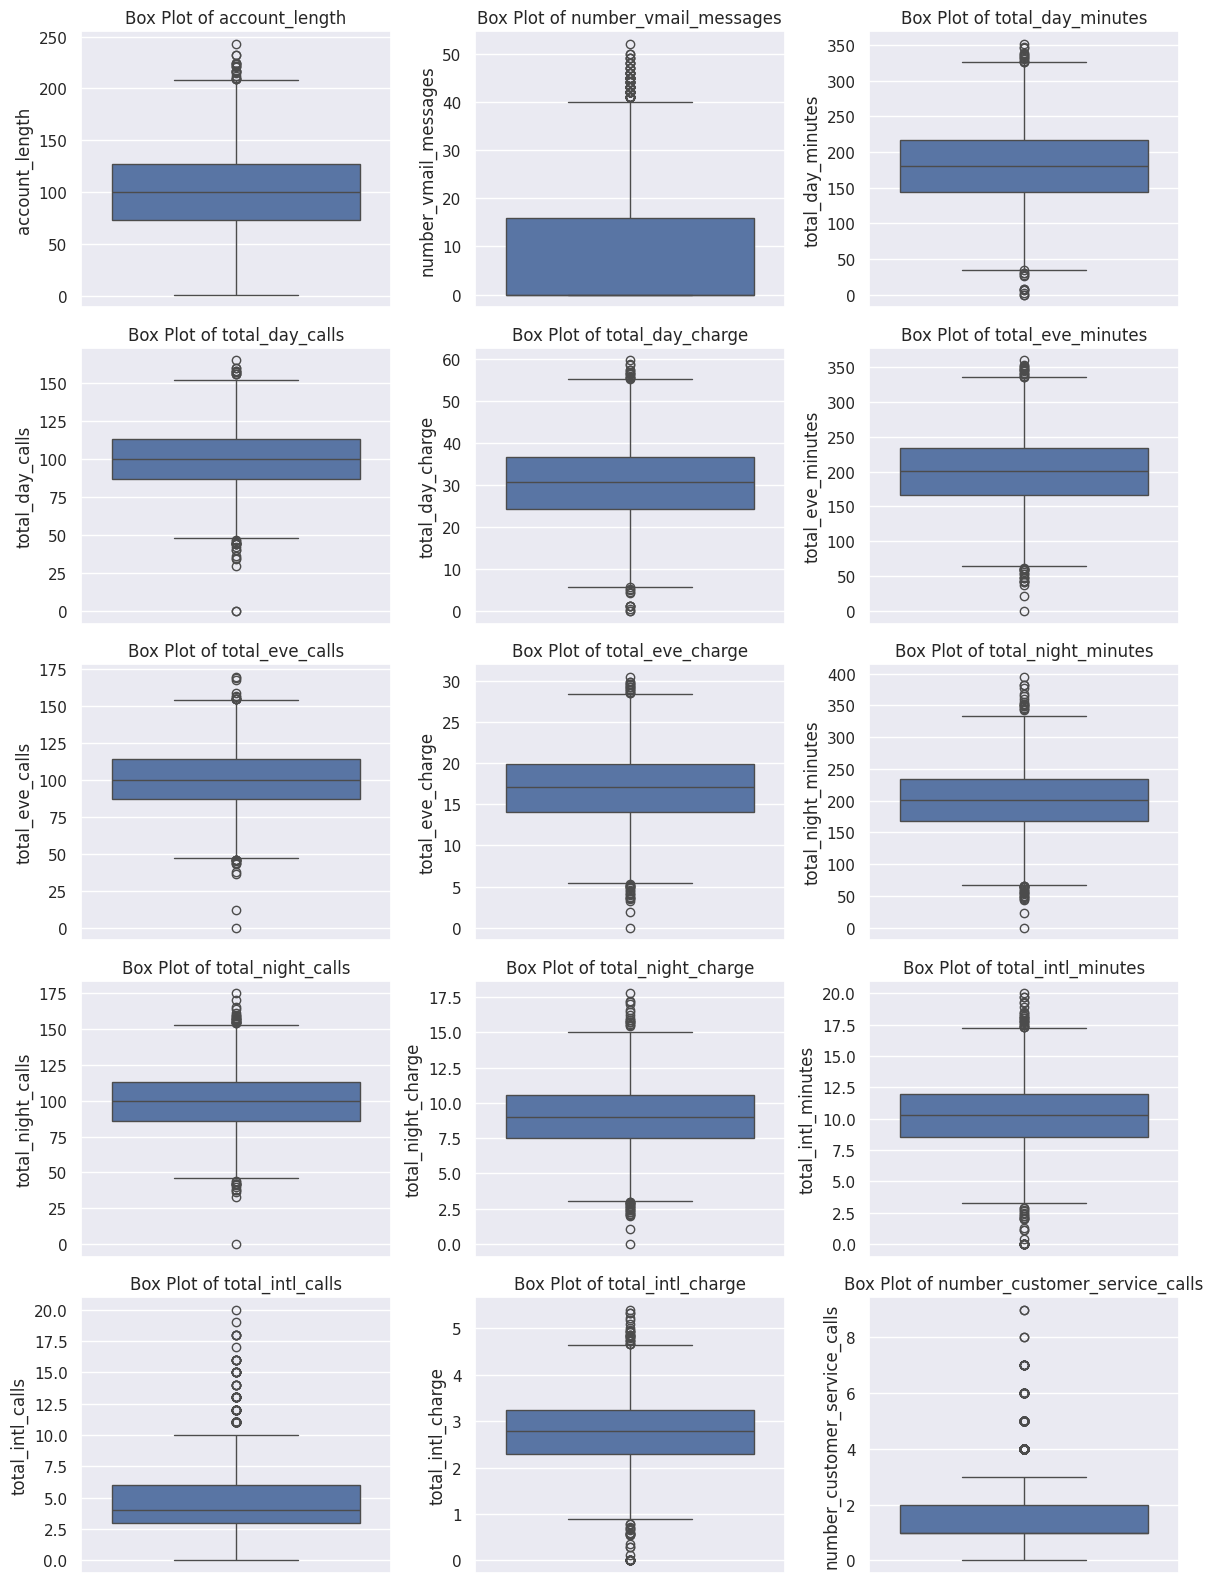

In [ ]:
# Tentukan jumlah baris dan kolom untuk subplot
num_rows = (num_numerical_columns // 3) + min(num_numerical_columns % 3, 1)
num_cols = min(num_numerical_columns, 3)

# Mendeteksi outliers dengan box plot
plt.figure(figsize=(12, 16))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Mendeteksi jumlah outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

outliers_info = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    outliers_info[column] = outliers_count

for column, count in outliers_info.items():
    print(f"{column}: {count}")

account_length: 20
number_vmail_messages: 86
total_day_minutes: 25
total_day_calls: 28
total_day_charge: 26
total_eve_minutes: 34
total_eve_calls: 24
total_eve_charge: 34
total_night_minutes: 37
total_night_calls: 33
total_night_charge: 37
total_intl_minutes: 62
total_intl_calls: 100
total_intl_charge: 62
number_customer_service_calls: 335


Pada kasus klasifikasi customer churn ini, outliers mungkin saja mewakili data yang sebenarnya dalam populasi. Menghapus outliers dapat menyebabkan kehilangan informasi penting tentang variasi alami dalam data. Oleh karena itu, kami tidak membuang outliers yang ada.

## Feature Encoding

### Label encoding for target variable

In [ ]:
# Melakukan label encoding untuk variabel target 'churn'
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

Hasil dari label encoding di atas akan mengubah nilai kategorikal pada kolom target 'churn' menjadi nilai numerik.

*   no = 0
*   yes = 1



### One-hot encoding for categorical features

In [ ]:
# Melakukan one-hot encoding untuk categorical features
categorical_features = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Hasil dari one-hot encoding di atas akan mengubah nilai kategorikal pada kolom categorical features menjadi nilai numerik. <br>
Misalnya, pada kasus di atas, value dari kolom 'international_plan' akan dijadikan features atau kolom. Lalu setiap kolomnya akan diisi dengan nilai 1 jika kolom tersebut sesuai dengan baris datanya.


## Standardization

In [ ]:
# Standardization numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('churn')
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

Standardization dilakukan untuk menyeragamkan nilai-nilai data sehingga seluruh data menjadi standar. Hal ini juga dilakukan karena pada tahap selanjutnya akan dilakukan pemodelan dengan menggunakan **model regresi logistik** yang mana membutuhkan **asumsi data berdistribusi normal**.

## Bundle preprocessing for numerical and categorical data

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

## Splitting Dataset

In [ ]:
# Split the training data into training and validation sets
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor.fit(X_train)

# Transform training and validation data
X_train_transformed = preprocessor.transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# Transform the test data
test_df_transformed = preprocessor.transform(test_df)

X_train_transformed.shape, X_val_transformed.shape, test_df_transformed.shape

((3400, 73), (850, 73), (750, 73))

# Modeling


## Classification Report

In [ ]:
# Logistic Regression, KNN, Decision Tree, and Random Forest without SMOTE
model_lr  = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')
model_dt  = DecisionTreeClassifier(max_depth = 9, random_state = 42, splitter = "best", criterion = "gini")
model_rf  = RandomForestClassifier(class_weight='balanced', random_state=42)

model_lr.fit(X_train_transformed, y_train)
y_pred_val_lr = model_lr.predict(X_val_transformed)

model_knn.fit(X_train_transformed, y_train)
y_pred_val_knn = model_knn.predict(X_val_transformed)

model_dt.fit(X_train_transformed, y_train)
y_pred_val_dt = model_dt.predict(X_val_transformed)

model_rf.fit(X_train_transformed, y_train)
y_pred_val_rf = model_rf.predict(X_val_transformed)

print("Logistic Regression without SMOTE:")
print(classification_report(y_val, y_pred_val_lr))
print("K-Nearest Neighbors without SMOTE:")
print(classification_report(y_val, y_pred_val_knn))
print("Decision Tree without SMOTE:")
print(classification_report(y_val, y_pred_val_dt))
print("Random Forest without SMOTE:")
print(classification_report(y_val, y_pred_val_rf))

Logistic Regression without SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       730
           1       0.33      0.71      0.45       120

    accuracy                           0.75       850
   macro avg       0.63      0.73      0.65       850
weighted avg       0.85      0.75      0.79       850

K-Nearest Neighbors without SMOTE:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       730
           1       0.86      0.27      0.41       120

    accuracy                           0.89       850
   macro avg       0.88      0.63      0.67       850
weighted avg       0.89      0.89      0.86       850

Decision Tree without SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       730
           1       0.89      0.63      0.74       120

    accuracy                           0.94       850
   macro avg       0.92      

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
# Logistic Regression, KNN, Decision Tree, and Random Forest with SMOTE
model_lr_smote = ImbPipeline(steps=[('smote', SMOTE(random_state=42)),
                                    ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

model_knn_smote = ImbPipeline(steps=[('smote', SMOTE(random_state=42)),
                                    ('classifier', KNeighborsClassifier())])

model_dt_smote = ImbPipeline(steps=[('smote', SMOTE(random_state=42)),
                                    ('classifier', DecisionTreeClassifier(random_state=42))])

model_rf_smote = ImbPipeline(steps=[('smote', SMOTE(random_state=42)),
                                    ('classifier', RandomForestClassifier(random_state=42))])

model_lr_smote.fit(X_train_transformed, y_train)
y_pred_val_lr_smote = model_lr_smote.predict(X_val_transformed)

model_knn_smote.fit(X_train_transformed, y_train)
y_pred_val_knn_smote = model_knn_smote.predict(X_val_transformed)

model_dt_smote.fit(X_train_transformed, y_train)
y_pred_val_dt_smote = model_dt_smote.predict(X_val_transformed)


model_rf_smote.fit(X_train_transformed, y_train)
y_pred_val_rf_smote = model_rf_smote.predict(X_val_transformed)

print("Logistic Regression with SMOTE:")
print(classification_report(y_val, y_pred_val_lr_smote))
print("K-Nearest Neighbors with SMOTE:")
print(classification_report(y_val, y_pred_val_knn_smote))
print("Decision Tree with SMOTE:")
print(classification_report(y_val, y_pred_val_dt_smote))
print("Random Forest with SMOTE:")
print(classification_report(y_val, y_pred_val_rf_smote))

Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       730
           1       0.34      0.74      0.46       120

    accuracy                           0.76       850
   macro avg       0.64      0.75      0.65       850
weighted avg       0.86      0.76      0.79       850

K-Nearest Neighbors with SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       730
           1       0.38      0.78      0.51       120

    accuracy                           0.79       850
   macro avg       0.67      0.78      0.68       850
weighted avg       0.87      0.79      0.81       850

Decision Tree with SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       730
           1       0.64      0.73      0.68       120

    accuracy                           0.90       850
   macro avg       0.80      0.83     

## Confusion Matrix

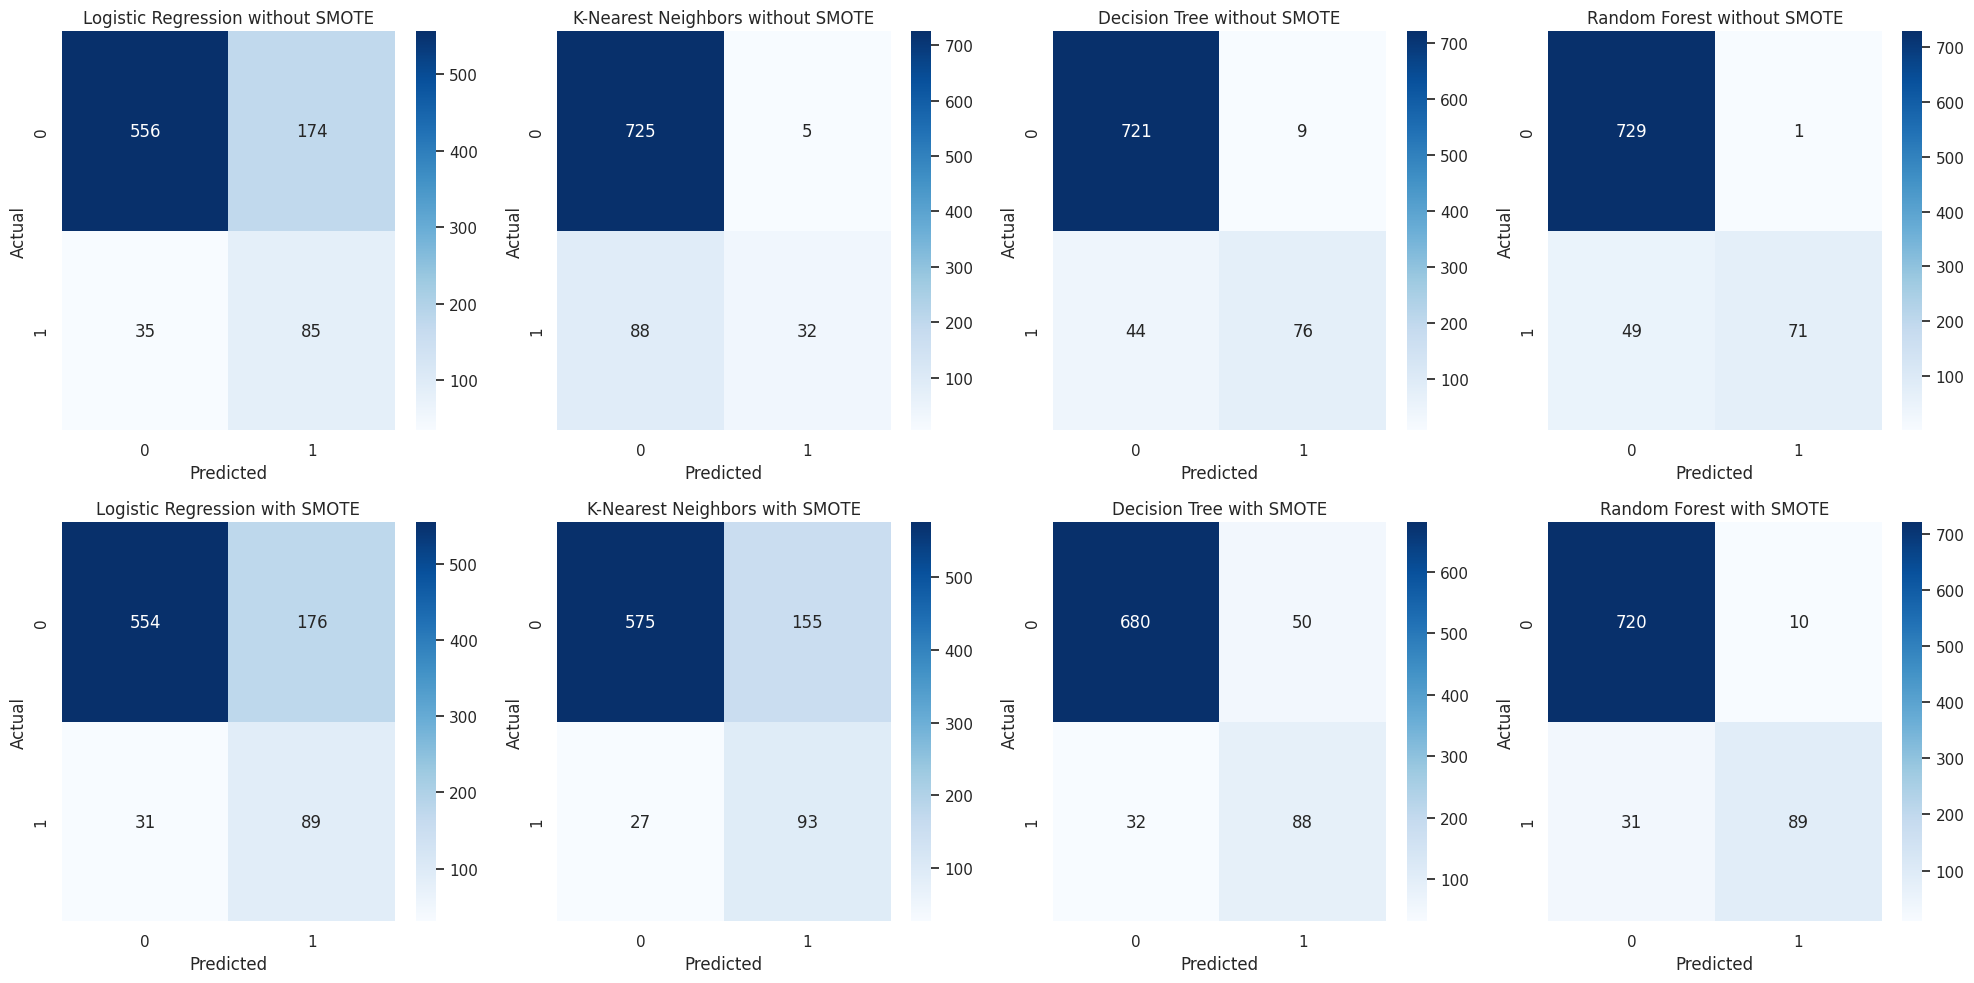

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Logistic Regression tanpa SMOTE
cm_lr = confusion_matrix(y_val, y_pred_val_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax[0, 0])
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')
ax[0, 0].set_title('Logistic Regression without SMOTE')

# K-Nearest Neighbors tanpa SMOTE
cm_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=ax[0, 1])
ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('Actual')
ax[0, 1].set_title('K-Nearest Neighbors without SMOTE')

# Decision Tree tanpa SMOTE
cm_dt = confusion_matrix(y_val, y_pred_val_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax[0, 2])
ax[0, 2].set_xlabel('Predicted')
ax[0, 2].set_ylabel('Actual')
ax[0, 2].set_title('Decision Tree without SMOTE')

# Random Forest tanpa SMOTE
cm_rf = confusion_matrix(y_val, y_pred_val_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax[0, 3])
ax[0, 3].set_xlabel('Predicted')
ax[0, 3].set_ylabel('Actual')
ax[0, 3].set_title('Random Forest without SMOTE')

# Logistic Regression dengan SMOTE
cm_lr_smote = confusion_matrix(y_val, y_pred_val_lr_smote)
sns.heatmap(cm_lr_smote, annot=True, fmt='d', cmap='Blues', ax=ax[1, 0])
ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('Actual')
ax[1, 0].set_title('Logistic Regression with SMOTE')

# K-Nearest Neighbors dengan SMOTE
cm_knn_smote = confusion_matrix(y_val, y_pred_val_knn_smote)
sns.heatmap(cm_knn_smote, annot=True, fmt='d', cmap='Blues', ax=ax[1, 1])
ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('Actual')
ax[1, 1].set_title('K-Nearest Neighbors with SMOTE')

# Decision Tree dengan SMOTE
cm_dt_smote = confusion_matrix(y_val, y_pred_val_dt_smote)
sns.heatmap(cm_dt_smote, annot=True, fmt='d', cmap='Blues', ax=ax[1, 2])
ax[1, 2].set_xlabel('Predicted')
ax[1, 2].set_ylabel('Actual')
ax[1, 2].set_title('Decision Tree with SMOTE')

# Random Forest dengan SMOTE
cm_rf_smote = confusion_matrix(y_val, y_pred_val_rf_smote)
sns.heatmap(cm_rf_smote, annot=True, fmt='d', cmap='Blues', ax=ax[1, 3])
ax[1, 3].set_xlabel('Predicted')
ax[1, 3].set_ylabel('Actual')
ax[1, 3].set_title('Random Forest with SMOTE')

plt.tight_layout()
plt.show()

## Model Interpretation

### Logistic Regression

In [ ]:
coef = model_lr.coef_[0]
features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
features = np.concatenate([numerical_features, features])

# Membuat DataFrame untuk melihat koefisien setiap fitur
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df

,Feature,Coefficient
19,state_CA,1.360335
70,international_plan_yes,1.343449
71,voice_mail_plan_no,1.169624
46,state_NJ,1.156521
41,state_MT,1.058861
...,...,...
29,state_IL,-0.951374
26,state_HI,-1.077861
72,voice_mail_plan_yes,-1.170745
69,international_plan_no,-1.344571


### Decision Tree

In [ ]:
# # Membuat decision tree
# plt.figure()
# clf = model_dt.fit(X_train_transformed, y_train)
# plot_tree(clf, filled=True)
# plt.title("Decision tree")
# plt.show()

# # Mengekspor gambar decision tree
# dot_data = tree.export_graphviz(clf, out_file=None)
# graph = graphviz.Source(dot_data)
# graph.render("churn_telco")

In [ ]:
# Melihat fitur penting dari model Decision Tree
importances = model_dt.feature_importances_
features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
features = np.concatenate([numerical_features, features])

# Membuat DataFrame untuk melihat pentingnya setiap fitur
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df


,Feature,Importance
2,total_day_minutes,0.290404
14,number_customer_service_calls,0.124937
13,total_intl_charge,0.106231
5,total_eve_minutes,0.087500
69,international_plan_no,0.082645
...,...,...
44,state_NE,0.000000
45,state_NH,0.000000
46,state_NJ,0.000000
47,state_NM,0.000000


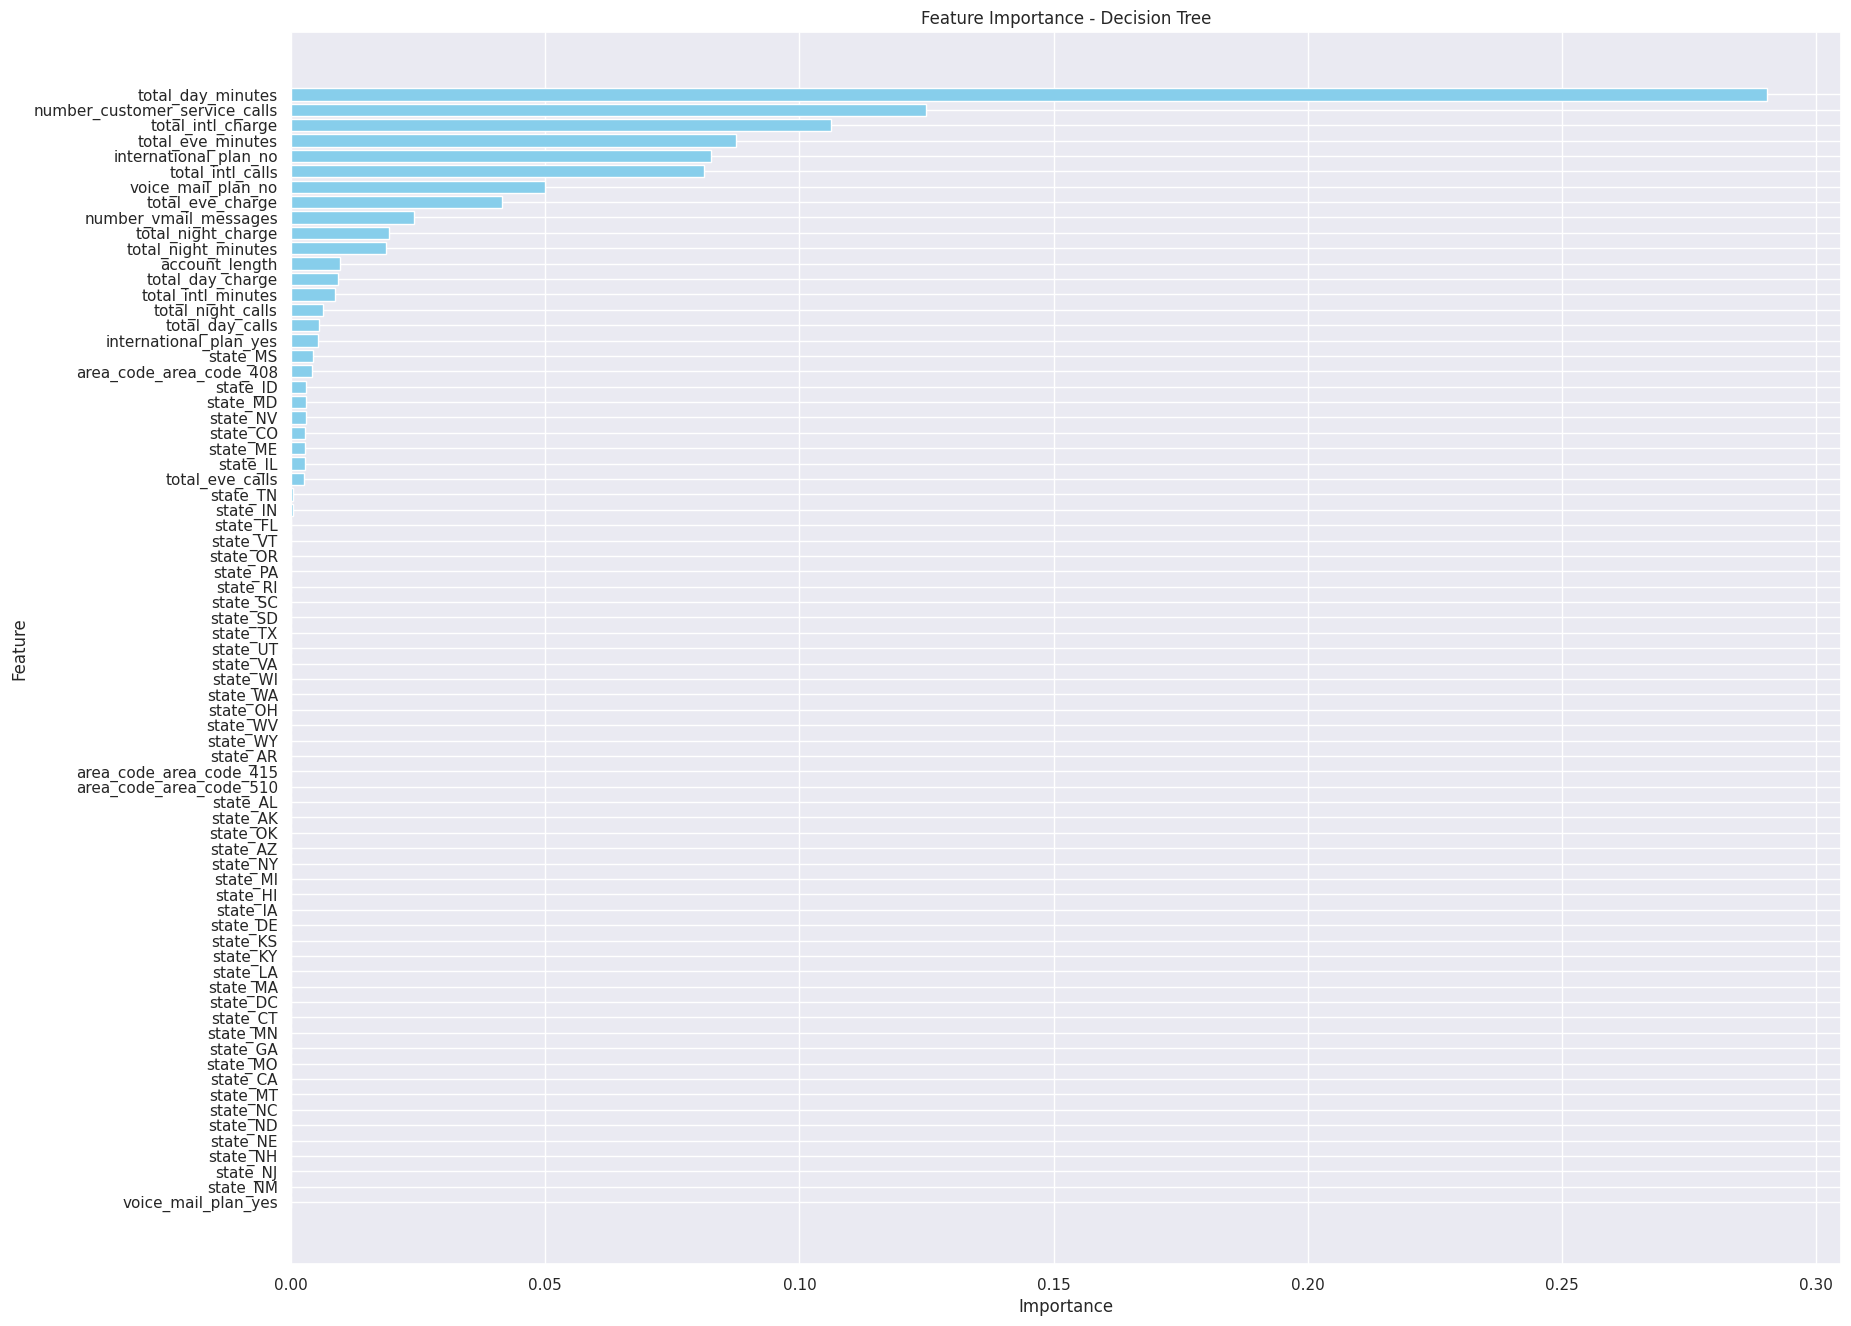

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi fitur penting
plt.figure(figsize=(20, 16))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.show()


### Random Forest

In [ ]:
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)

# Menyiapkan nama fitur sesuai dengan preprocessing
features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
features = np.concatenate([numerical_features, features])

# Membuat DataFrame untuk melihat pentingnya setiap fitur
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances, 'Std': std})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df


,Feature,Importance,Std
2,total_day_minutes,0.123977,0.071983
14,number_customer_service_calls,0.123639,0.042084
4,total_day_charge,0.123092,0.065567
5,total_eve_minutes,0.054934,0.020595
69,international_plan_no,0.049977,0.040241
...,...,...,...
26,state_HI,0.000706,0.001141
43,state_ND,0.000676,0.001188
45,state_NH,0.000652,0.001484
15,state_AK,0.000593,0.000932


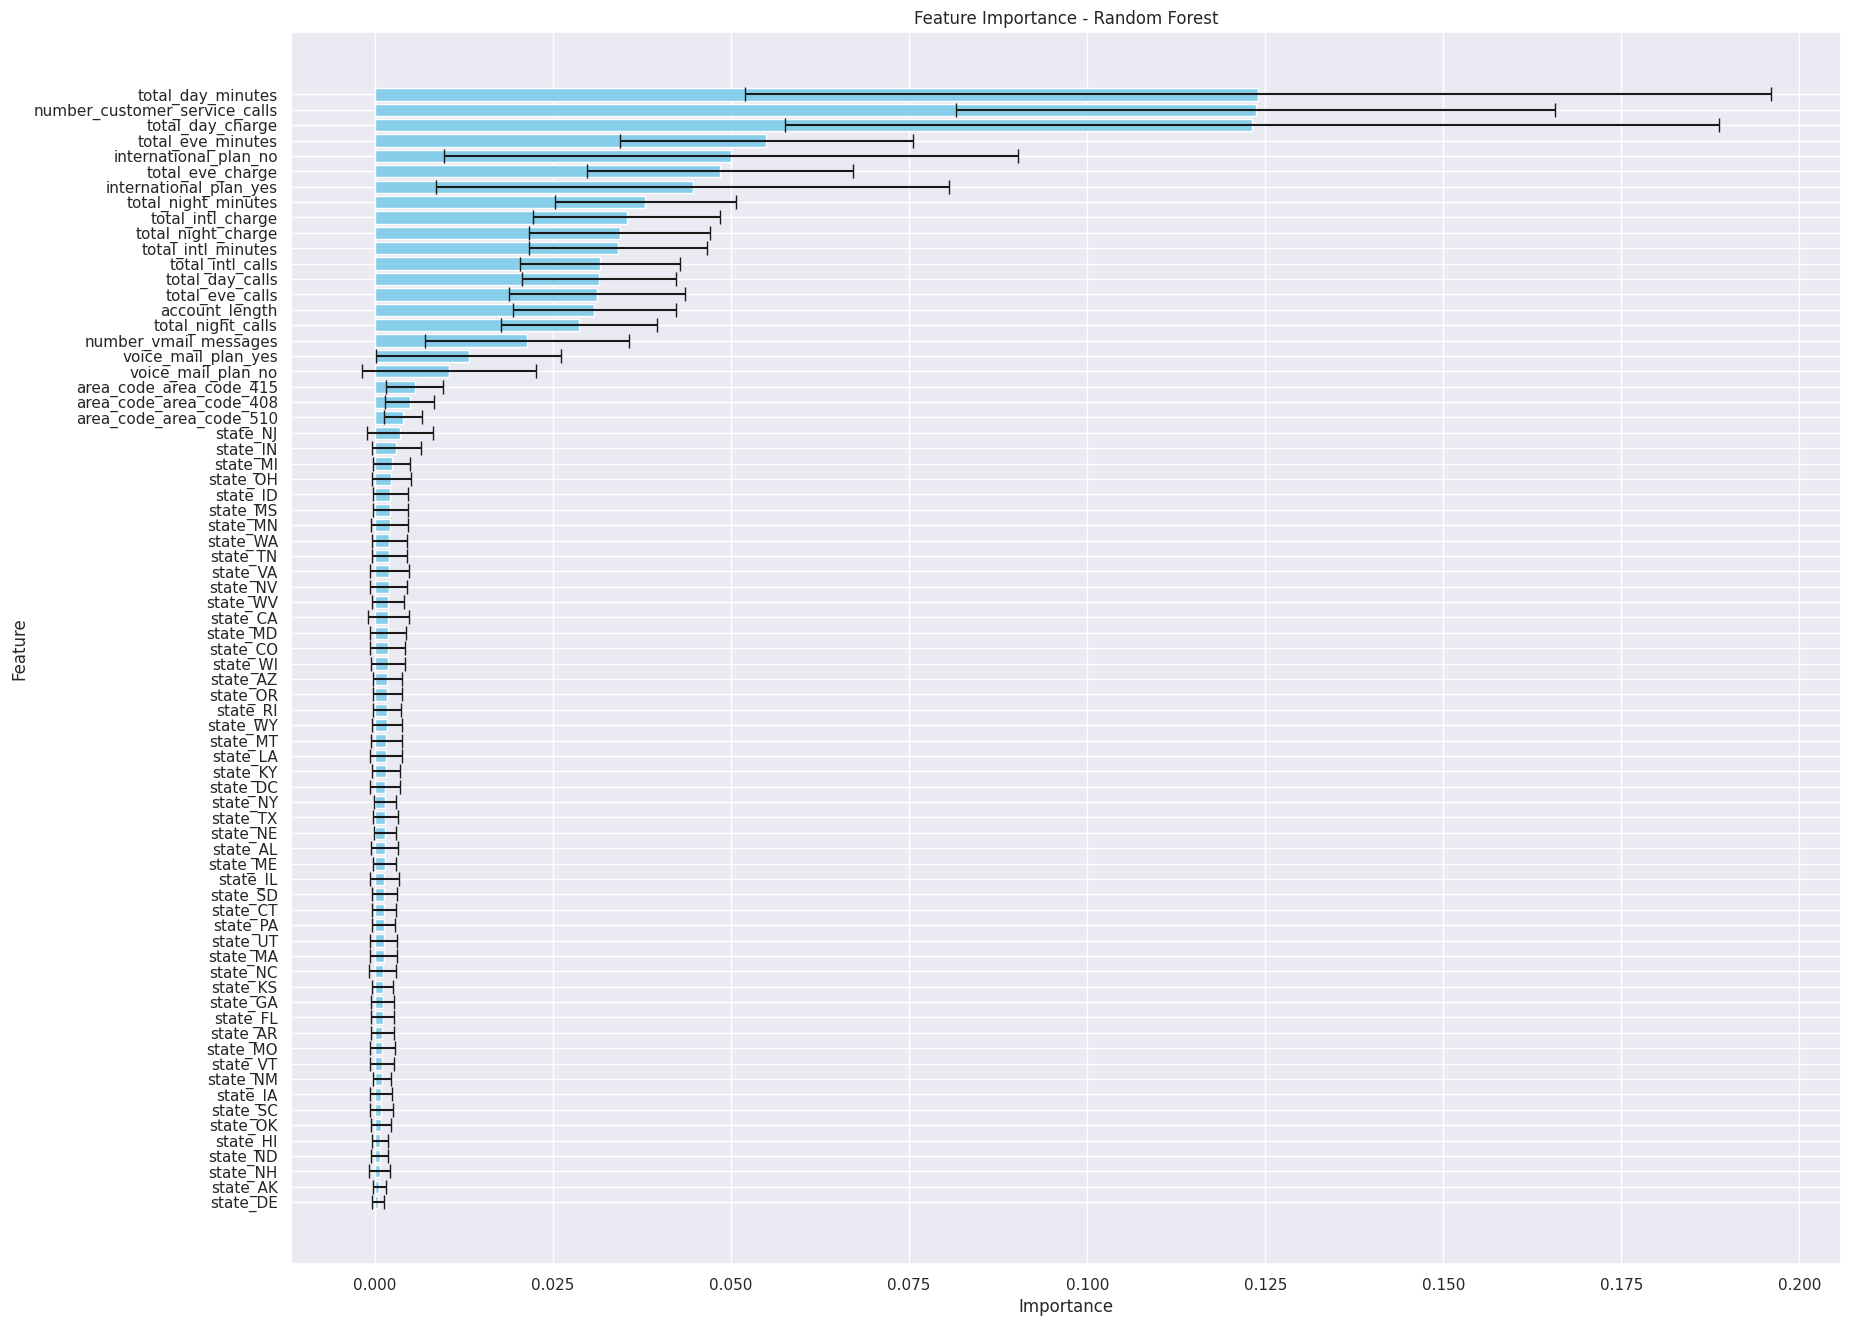

In [ ]:
# Visualisasi fitur penting
plt.figure(figsize=(20, 16))
plt.barh(importances_df['Feature'], importances_df['Importance'], xerr=importances_df['Std'], color='skyblue', capsize=5)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Model Testing

In [ ]:
y_pred_test = model_rf_smote.predict(test_df_transformed)

# Menghasilkan DataFrame dari prediksi untuk kemudahan interpretasi
predictions_df = pd.DataFrame({
    'id': test_df['id'],
    'predicted_churn': y_pred_test
})

# Mengubah prediksi numerik (0 atau 1) menjadi kategorikal ('no' atau 'yes')
predictions_df['predicted_churn'] = predictions_df['predicted_churn'].map({0: 'no', 1: 'yes'})

# Menampilkan DataFrame yang sudah diubah
predictions_df

,id,predicted_churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


# Kesimpulan dan Saran

**Kesimpulan:** <br>
Model **Random Forest dengan teknik SMOTE** menghasilkan tingkat **akurasi** sebesar **95%**, dengan kemampuan mendeteksi pelanggan churn (**recall**) sebesar **74%** serta mencapai **F1-score** sebesar **81%**.

**Saran:**
1. Perusahaan perlu cepat tanggap dan memberikan solusi yang memuaskan ketika pelanggan menyampaikan keluhan melalui Customer Service, agar churn rate semakin berkurang.
2. Perusahaan perlu memastikan layanan internasional yang diberikan berkualitas tinggi dan responsif terhadap kebutuhan pelanggan karena pengguna cenderung untuk churn.
3. Perusahaan dapat memberikan diskon atau bonus kepada pengguna yang telah berlangganan Voice Mail selama periode tertentu untuk menjaga retensi pelanggan.